#### Librerias

In [2]:
import geopandas as gpd
from src.dowload_dem import *


#### Se lee el shape de la cartas 1:1000 (div10k) y del polígono del cual se quieren descargar los dem de INEGI

In [3]:
poligono = gpd.read_file("inputs/cdmx.zip")
div10 = gpd.read_file("inputs/div10k.zip")

#### Se optienen las cartas a descargar 

Mediante la intersección de las cartas 1:1000  con el polígono

<Axes: >

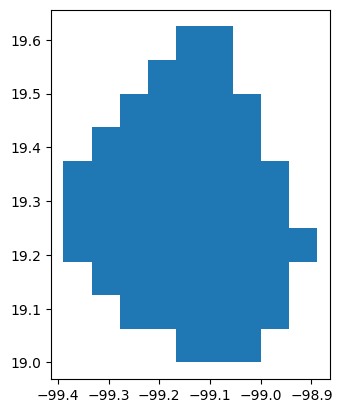

In [5]:
cartas = div10[div10.geometry.intersects(poligono.union_all())]
cartas.plot()

#### Opción 1: Descargar DEM de INEGI por su clave, tipo y extensión 

En este ejemplo se van a descargar los primeros 3 dem de terreno en formato '.grid' de INEGI

In [6]:
datos = {
    "clave": "", #clave de la carta 1:10000
    "terreno": True, #Terreno' (True) o 'Superficie' (False)
    "ext"  : 'ascii' , #  'ascii', 'bil', 'grid', 'tif'
    "folder_output": 'output/', #carpeta de salida
}

inegi_api = INEGI_API()

for clave in cartas["clave10k"].to_list()[0:3]: # Solo de descargan 3 de los 57 DEM
    datos["clave"]= clave
    inegi_api.download_dem(**datos)


e14a29e2 descargado y guardado
e14a29e3 descargado y guardado
e14a29e4 descargado y guardado


#### Opción 2. Descargar DEM por liga

Para este ejemplo, utilizaremos el método **crear_df** de la clase **ProcesadorCartas** para generar un DataFrame que contenga todos los Modelos Digitales de Elevación (DEM) disponibles por carta. 

Para utilizar **ProcesadorCartas**, es necesario proporcionarle como parámetros la instancia de la clase INEGI_API y una lista de las claves de las cartas a escala 1:10,000.

In [12]:
# Se crea la lista de claves
lista_cartas = cartas['clave10k'].drop_duplicates().to_list()

# Se crea la instancia de ProcesadorCartas
procesador = ProcesadorCartas(inegi_api, lista_cartas)

# Se crea el DataFrame con los DEM disponibles por carta
df = procesador.crear_df()
df.head(3)

,key,titulo,entidad,url,edicion,af,escala,clave_carta,datum,iin,...,peso,origen,web,control,url.valor,url.target,url.estilo,adicional.estilo,tipo,id
0,702825770617,Modelos Digitales de Elevación de Alta Resoluc...,México,/app/biblioteca/ficha.html?upc=702825770617,2011,None,1:10 000,e14a29e2,ITRF92,False,...,4.04,1,False,False,/contenidos/productos/prod_serv/contenidos/esp...,_blank,,,Terreno,702825770617_0
1,702825770594,Modelos Digitales de Elevación de Alta Resoluc...,México,/app/biblioteca/ficha.html?upc=702825770594,2011,None,1:10 000,e14a29e2,ITRF92,False,...,4.11,1,False,False,/contenidos/productos/prod_serv/contenidos/esp...,_blank,,,Superficie,702825770594_1
2,702825770600,Modelos Digitales de Elevación de Alta Resoluc...,México,/app/biblioteca/ficha.html?upc=702825770600,2011,None,1:10 000,e14a29e2,ITRF92,False,...,9.79,1,False,False,/contenidos/productos/prod_serv/contenidos/esp...,_blank,,,Terreno,702825770600_2


La salida anterior, muestra los valores de cada solicitud 'POST' para cada una de las cartas. 
________________________


El segundo paso es filtrar el DataFrame obtenido para descargar los DEM de interés. 

- Si el formato ('ascii', 'bil', 'grid', 'tif') no es crucial y solo se desea obtener el DEM más reciente para cada carta, se puede utilizar: 

    ``` python
    df_filtrado = procesador.filtrar_cartas(df=df, terreno=True, quick=True)
    ```
- Por el contrario, si se desea establecer un orden de preferencia específico para los formatos, se puede usar:
    ``` python
    df_filtrado = procesador.filtrar_cartas(df=df, terreno=True, formatos=['ascii', 'bil', 'grid', 'tif'])
    ```

    Aquí se especifica que el formato preferido es 'ascii'; si no está disponible, se buscará 'bil', y así sucesivamente. Ajuste el orden según sus preferencias específicas


In [13]:
df_filtrado = procesador.filtrar_cartas(df=df, quick=True)

Finalmente para descargar los DEM, se utilizará el metodo **download_dem** con los argumentos de clave y enlace, como se muestra a continuación:

In [14]:
for index, row in df_filtrado.head(3).iterrows():
    inegi_api.download_dem(clave=row["clave_carta"],liga=row['url.valor'])

e14a39d2 descargado y guardado
e14a39d1 descargado y guardado
e14a39d4 descargado y guardado


El parámetro "clave" se utiliza para nombrar el archivo ZIP descargado, aunque es opcional cuando se descarga el DEM por enlace, se recomienda usarlo para tener control sobre los archivos descargados.

Si no se proporciona la clave, se utiliza el valor 'upc' del enlace para nombrar el archivo ZIP y la salida se verá así:

``` python
889463853473 descargado y guardado
889463853466 descargado y guardado
...
``` 


####  El contenido del DEM descargado se vería así:

![Salida-DEM](images/salida_dem.png)


**Nota**: El contenido del archivo ZIP utiliza barras invertidas ("\") como separadores, comúnmente empleados en entornos Windows.




#### A continuación se muestra el archivo DEM descargado 

![Mapa-DEM](images/map_dem.png)